# Sobre a Base de dados

Age : Idade do paciente

Sex : Sexo do paciente

    • 0 : Feminino
    • 1 : Masculino

exang : Angina provocada por exercícios 

    • 1: Sim 
    • 0: Não

ca : Número de grandes vasos (0-3)

cp : Tipo de dor no peito

    • Valor 1: Angina típica
    • Valor 2: Angina atípica
    • Valor 3: Dor não anginosa
    • Valor 4: Assintomático

trtbps : Pressão sanguínea em repouso (por mm/Hg)

chol : Colesterol em mg/dl obtida via sensor BMI 

fbs : Açúcar no sangue em jejum > 120 mg/dl

    • Valor 1: Verdadeiro
    • Valor 2: Falso


rest_ecg : Resultados eletrocardiográficos em repouso

    • Valor 0: Normal
    • Valor 1: Tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão ST> 0,05 mV)
    • Valor 2: Mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

thalach : Frequência cardíaca máxima alcançada

oldpeak : Depressão de ST induzida por exercício em relação ao repouso

slp : Inclinação do pico no segmento ST de exercício 

    • 2: Inclinação para cima
    • 1: Plano
    • 0: Inclinação para baixo)
    
thal : 
    
    • 3: Defeito reversível
    • 2: Normal
    • 1: Defeito corrigido

output : 

    • 0: Menor chance de ataque cardíaco 
    • 1: Maior chance de ataque cardíaco

# Objetivo

Realizar a Análise Exploratória da base de dados, afim de encontrar correlações.

# Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregando dados

In [2]:
#Importar dataframe, obtido no site Kaggle
df = pd.read_csv('heart.csv')

# Visualização dos dados

In [3]:
display(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


A tabela apresenta informações referentes a idade e saúde cardiovascular de cada indivíduo, e possui um output que informa se a pessoa possui risco de sofrer um ataque cardíaco, ou não.

# Visualização das informações sobre os dados

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Pelas informações trazidas, não será necessário tratar nulos ou tipo de dado.

# Verificar quantidade de valores para cada sexo

In [5]:
sex_count = df['sex'].value_counts(normalize=True)
print(sex_count)

1    0.683168
0    0.316832
Name: sex, dtype: float64


Podemos verificar que a amostragem do sexo feminino (indicado pelo valor 0), é menor que a do sexo masculino.

# Criar função para verificar se existe algum valor outlier

In [6]:
#Variáveis que serão responsáveis pela localização de outliers

outliers = []
row_outlier = []

# Cria função para encontrar outliers

def find_outliers(data_frame):
    
    #Variáveis com medidas separatrizes
    q1 = np.quantile(data_frame,q=0.2)
    q2 = np.median(data_frame)
    q3 = np.quantile(data_frame, q=0.80)
    
    #Definição do limite inferior
    lower_limit = int((q2-(q3-q1)*1.5))
    print('O nome da coluna é :', data_frame.name)
    print('A mediana é :', q2,'\nO primeiro Quartil é de: ', q1, '\nO terceiro Quartil é de: ', q3)
    print('O limite inferior é de: ',lower_limit)
    print('O valor mínimo da coluna é: ',min(data_frame))
    
    #Definição do limite superior
    upper_limit = int((q2+(q3-q1)*1.5))
    print('O limite superior é de: ',upper_limit)
    print('O valor máximo da coluna é de: ',max(data_frame))
    
    #Plot de boxplot para visualização e confirmação dos outliers 
    plt.boxplot(data_frame)
    plt.show()
    
    #Variável para contar linhas
    count_rows = 0
    
    #Laço para percorrer uma coluna
    for dado in data_frame:
        #Validação de que o dado está entre os limites estabelecidos
        if dado < lower_limit or dado > upper_limit:
            #Caso o valor não esteja entre o limite estabelecido, arescenta valor da linha a row_outlier
            row_outlier.append(count_rows)
            #Printa as informações referente ao dado, para conferência
            print('O dado ', dado, ' da coluna ', data_frame.name, ' é um outlier.')
        #Acrescenta +1 ao contador
        count_rows = count_rows+1
    print('---')

                     
    return outliers

# Criar repetição para executar a função find_outliers em todas as colunas 

O nome da coluna é : age
A mediana é : 55.0 
O primeiro Quartil é de:  45.0 
O terceiro Quartil é de:  62.0
O limite inferior é de:  29
O valor mínimo da coluna é:  29
O limite superior é de:  80
O valor máximo da coluna é de:  77


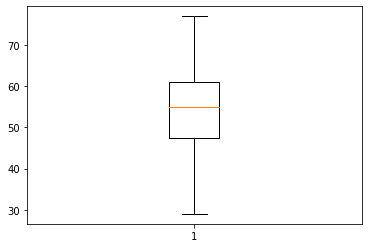

---
O nome da coluna é : sex
A mediana é : 1.0 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  1.0
O limite inferior é de:  0
O valor mínimo da coluna é:  0
O limite superior é de:  2
O valor máximo da coluna é de:  1


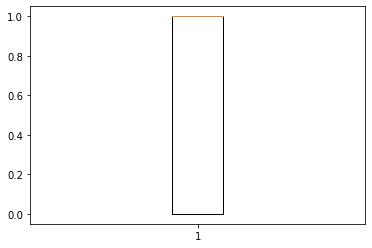

---
O nome da coluna é : cp
A mediana é : 1.0 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  2.0
O limite inferior é de:  -2
O valor mínimo da coluna é:  0
O limite superior é de:  4
O valor máximo da coluna é de:  3


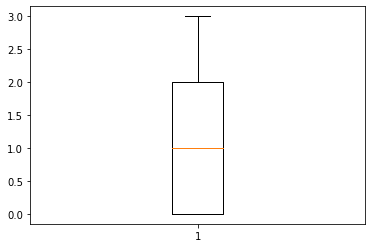

---
O nome da coluna é : trtbps
A mediana é : 130.0 
O primeiro Quartil é de:  120.0 
O terceiro Quartil é de:  144.0
O limite inferior é de:  94
O valor mínimo da coluna é:  94
O limite superior é de:  166
O valor máximo da coluna é de:  200


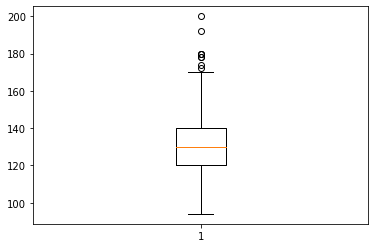

O dado  172  da coluna  trtbps  é um outlier.
O dado  178  da coluna  trtbps  é um outlier.
O dado  180  da coluna  trtbps  é um outlier.
O dado  170  da coluna  trtbps  é um outlier.
O dado  170  da coluna  trtbps  é um outlier.
O dado  180  da coluna  trtbps  é um outlier.
O dado  200  da coluna  trtbps  é um outlier.
O dado  170  da coluna  trtbps  é um outlier.
O dado  174  da coluna  trtbps  é um outlier.
O dado  192  da coluna  trtbps  é um outlier.
O dado  178  da coluna  trtbps  é um outlier.
O dado  180  da coluna  trtbps  é um outlier.
O dado  170  da coluna  trtbps  é um outlier.
---
O nome da coluna é : chol
A mediana é : 240.0 
O primeiro Quartil é de:  204.0 
O terceiro Quartil é de:  285.20000000000005
O limite inferior é de:  118
O valor mínimo da coluna é:  126
O limite superior é de:  361
O valor máximo da coluna é de:  564


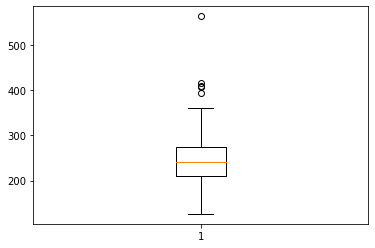

O dado  417  da coluna  chol  é um outlier.
O dado  564  da coluna  chol  é um outlier.
O dado  394  da coluna  chol  é um outlier.
O dado  407  da coluna  chol  é um outlier.
O dado  409  da coluna  chol  é um outlier.
---
O nome da coluna é : restecg
A mediana é : 1.0 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  1.0
O limite inferior é de:  0
O valor mínimo da coluna é:  0
O limite superior é de:  2
O valor máximo da coluna é de:  2


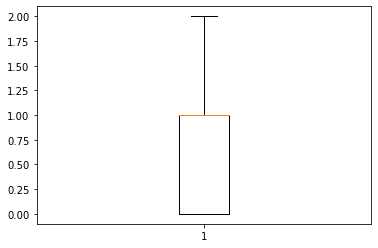

---
O nome da coluna é : thalachh
A mediana é : 153.0 
O primeiro Quartil é de:  130.0 
O terceiro Quartil é de:  170.0
O limite inferior é de:  93
O valor mínimo da coluna é:  71
O limite superior é de:  213
O valor máximo da coluna é de:  202


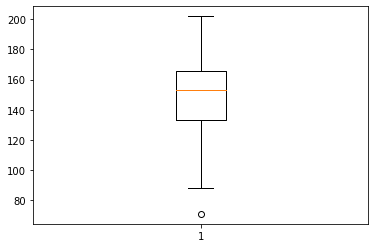

O dado  88  da coluna  thalachh  é um outlier.
O dado  71  da coluna  thalachh  é um outlier.
O dado  90  da coluna  thalachh  é um outlier.
---
O nome da coluna é : exng
A mediana é : 0.0 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  1.0
O limite inferior é de:  -1
O valor mínimo da coluna é:  0
O limite superior é de:  1
O valor máximo da coluna é de:  1


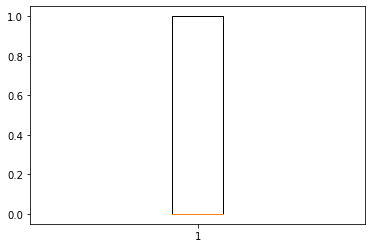

---
O nome da coluna é : oldpeak
A mediana é : 0.8 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  1.9
O limite inferior é de:  -2
O valor mínimo da coluna é:  0.0
O limite superior é de:  3
O valor máximo da coluna é de:  6.2


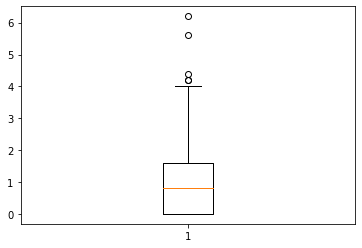

O dado  3.5  da coluna  oldpeak  é um outlier.
O dado  4.2  da coluna  oldpeak  é um outlier.
O dado  3.6  da coluna  oldpeak  é um outlier.
O dado  3.1  da coluna  oldpeak  é um outlier.
O dado  3.2  da coluna  oldpeak  é um outlier.
O dado  3.4  da coluna  oldpeak  é um outlier.
O dado  3.6  da coluna  oldpeak  é um outlier.
O dado  6.2  da coluna  oldpeak  é um outlier.
O dado  3.6  da coluna  oldpeak  é um outlier.
O dado  4.0  da coluna  oldpeak  é um outlier.
O dado  5.6  da coluna  oldpeak  é um outlier.
O dado  4.0  da coluna  oldpeak  é um outlier.
O dado  4.2  da coluna  oldpeak  é um outlier.
O dado  3.8  da coluna  oldpeak  é um outlier.
O dado  3.4  da coluna  oldpeak  é um outlier.
O dado  3.2  da coluna  oldpeak  é um outlier.
O dado  3.6  da coluna  oldpeak  é um outlier.
O dado  4.4  da coluna  oldpeak  é um outlier.
O dado  4.0  da coluna  oldpeak  é um outlier.
O dado  3.4  da coluna  oldpeak  é um outlier.
---
O nome da coluna é : slp
A mediana é : 1.0 
O primeiro Q

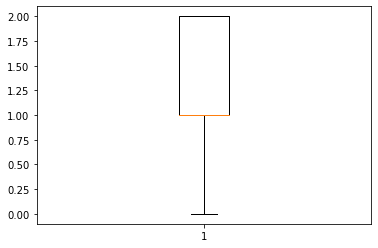

---
O nome da coluna é : caa
A mediana é : 0.0 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  2.0
O limite inferior é de:  -3
O valor mínimo da coluna é:  0
O limite superior é de:  3
O valor máximo da coluna é de:  4


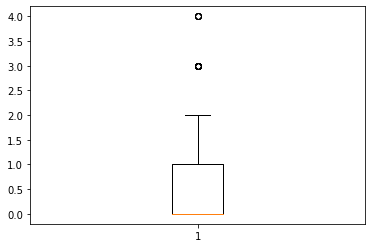

O dado  4  da coluna  caa  é um outlier.
O dado  4  da coluna  caa  é um outlier.
O dado  4  da coluna  caa  é um outlier.
O dado  4  da coluna  caa  é um outlier.
O dado  4  da coluna  caa  é um outlier.
---
O nome da coluna é : thall
A mediana é : 2.0 
O primeiro Quartil é de:  2.0 
O terceiro Quartil é de:  3.0
O limite inferior é de:  0
O valor mínimo da coluna é:  0
O limite superior é de:  3
O valor máximo da coluna é de:  3


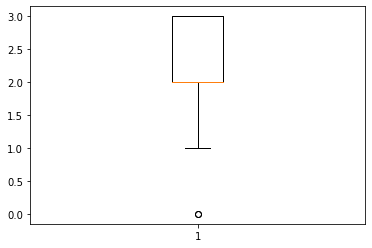

---
O nome da coluna é : output
A mediana é : 1.0 
O primeiro Quartil é de:  0.0 
O terceiro Quartil é de:  1.0
O limite inferior é de:  0
O valor mínimo da coluna é:  0
O limite superior é de:  2
O valor máximo da coluna é de:  1


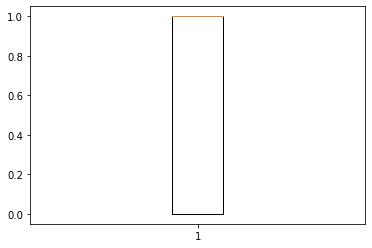

---


In [7]:
#Repetição para que a função percorra coluna a coluna
for coluna in df:
    #Coluna fbs não precisa de tratamento, apesar da pouca frequência do valor 1, é um dado necessário para a análise
    if coluna != 'fbs':
        data_colun = df[coluna]
        find_outliers(data_colun)
    

Após o retorno da função, foi possível localizar alguns valores outliers.

# Exclusão dos outliers

In [8]:
#Elimina valores duplicados duplicados
row_outlier = list( dict.fromkeys(row_outlier) )
df = df.drop(row_outlier)

Após a exclusão, apenas validarei a quantidade de linhas excluídas.

In [9]:
#Valida exclusões
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       262 non-null    int64  
 1   sex       262 non-null    int64  
 2   cp        262 non-null    int64  
 3   trtbps    262 non-null    int64  
 4   chol      262 non-null    int64  
 5   fbs       262 non-null    int64  
 6   restecg   262 non-null    int64  
 7   thalachh  262 non-null    int64  
 8   exng      262 non-null    int64  
 9   oldpeak   262 non-null    float64
 10  slp       262 non-null    int64  
 11  caa       262 non-null    int64  
 12  thall     262 non-null    int64  
 13  output    262 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.7 KB
None


# Visualizar porcentagem de distribuição dos outputs para cada coluna

In [10]:
# Demonstra valores e suas respectivas porcentagens para cada coluna

for coluna in df:
    data = df[coluna]
    agrupamento = df.groupby(data).output.value_counts(normalize=True)
    print(f'Valores referentes a coluna {data.name}')
    display(agrupamento)
    print('---')

Valores referentes a coluna age


age  output
29   1         1.00
34   1         1.00
35   0         0.50
     1         0.50
37   1         1.00
               ... 
70   1         0.25
71   1         1.00
74   1         1.00
76   1         1.00
77   0         1.00
Name: output, Length: 72, dtype: float64

---
Valores referentes a coluna sex


sex  output
0    1         0.819277
     0         0.180723
1    0         0.525140
     1         0.474860
Name: output, dtype: float64

---
Valores referentes a coluna cp


cp  output
0   0         0.686441
    1         0.313559
1   1         0.833333
    0         0.166667
2   1         0.805195
    0         0.194805
3   1         0.736842
    0         0.263158
Name: output, dtype: float64

---
Valores referentes a coluna trtbps


trtbps  output
94      1         1.0
100     0         0.5
        1         0.5
101     1         1.0
102     1         1.0
                 ... 
155     1         1.0
156     1         1.0
160     0         0.5
        1         0.5
165     0         1.0
Name: output, Length: 64, dtype: float64

---
Valores referentes a coluna chol


chol  output
126   1         1.0
131   0         1.0
141   1         1.0
149   0         0.5
      1         0.5
               ... 
341   0         1.0
342   1         1.0
353   0         1.0
354   1         1.0
360   1         1.0
Name: output, Length: 177, dtype: float64

---
Valores referentes a coluna fbs


fbs  output
0    1         0.581498
     0         0.418502
1    1         0.600000
     0         0.400000
Name: output, dtype: float64

---
Valores referentes a coluna restecg


restecg  output
0        1         0.504000
         0         0.496000
1        1         0.659259
         0         0.340741
2        0         0.500000
         1         0.500000
Name: output, dtype: float64

---
Valores referentes a coluna thalachh


thalachh  output
95        0         1.0
96        0         0.5
          1         0.5
97        0         1.0
99        0         1.0
                   ... 
188       1         1.0
190       1         1.0
192       1         1.0
194       1         1.0
202       1         1.0
Name: output, Length: 126, dtype: float64

---
Valores referentes a coluna exng


exng  output
0     1         0.71978
      0         0.28022
1     0         0.72500
      1         0.27500
Name: output, dtype: float64

---
Valores referentes a coluna oldpeak


oldpeak  output
0.0      1         0.752688
         0         0.247312
0.1      1         0.666667
         0         0.333333
0.2      1         0.818182
         0         0.181818
0.3      1         0.666667
         0         0.333333
0.4      1         0.875000
         0         0.125000
0.5      1         0.750000
         0         0.250000
0.6      1         0.692308
         0         0.307692
0.7      1         1.000000
0.8      0         0.500000
         1         0.500000
0.9      0         0.666667
         1         0.333333
1.0      0         0.636364
         1         0.363636
1.1      1         1.000000
1.2      0         0.600000
         1         0.400000
1.3      1         1.000000
1.4      0         0.538462
         1         0.461538
1.5      1         0.800000
         0         0.200000
1.6      1         0.666667
         0         0.333333
1.8      0         0.700000
         1         0.300000
1.9      0         0.500000
         1         0.500000
2.0 

---
Valores referentes a coluna slp


slp  output
0    1         0.583333
     0         0.416667
1    0         0.615385
     1         0.384615
2    1         0.759398
     0         0.240602
Name: output, dtype: float64

---
Valores referentes a coluna caa


caa  output
0    1         0.778481
     0         0.221519
1    0         0.666667
     1         0.333333
2    0         0.750000
     1         0.250000
3    0         0.812500
     1         0.187500
Name: output, dtype: float64

---
Valores referentes a coluna thall


thall  output
0      0         0.500000
       1         0.500000
1      0         0.600000
       1         0.400000
2      1         0.809211
       0         0.190789
3      0         0.752688
       1         0.247312
Name: output, dtype: float64

---
Valores referentes a coluna output


output  output
0       0         1.0
1       1         1.0
Name: output, dtype: float64

---


Aqui pude visualizar que algumas colunas possuem valores chaves para entender quais são os casos mais propensos a sofrer um ataque cardíaco

# Visualização gráfica da contagem por output em cada coluna

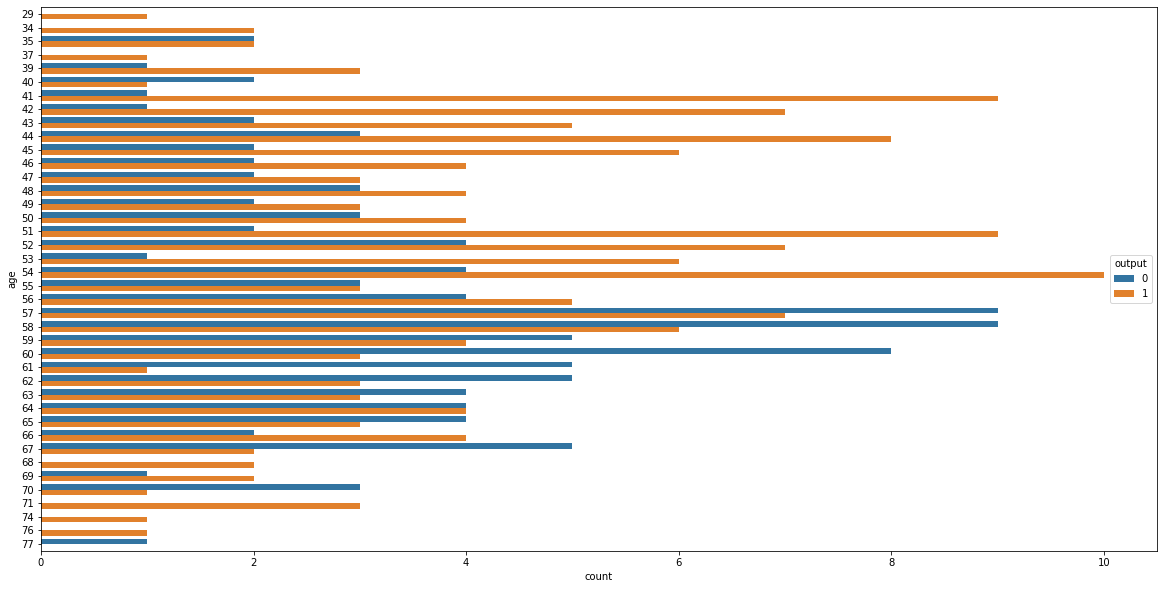

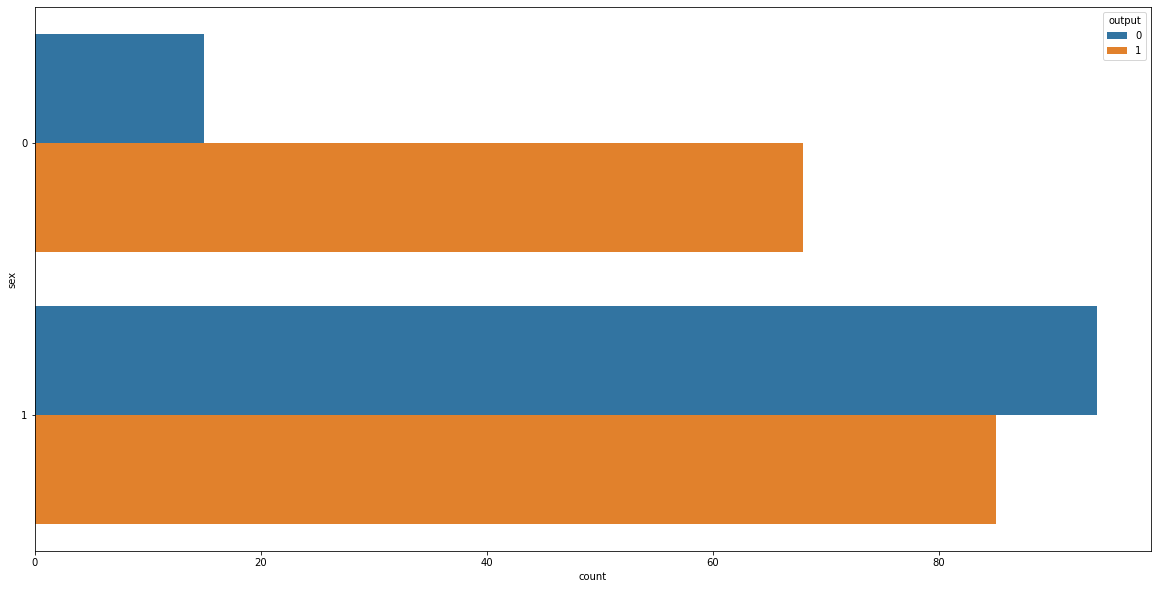

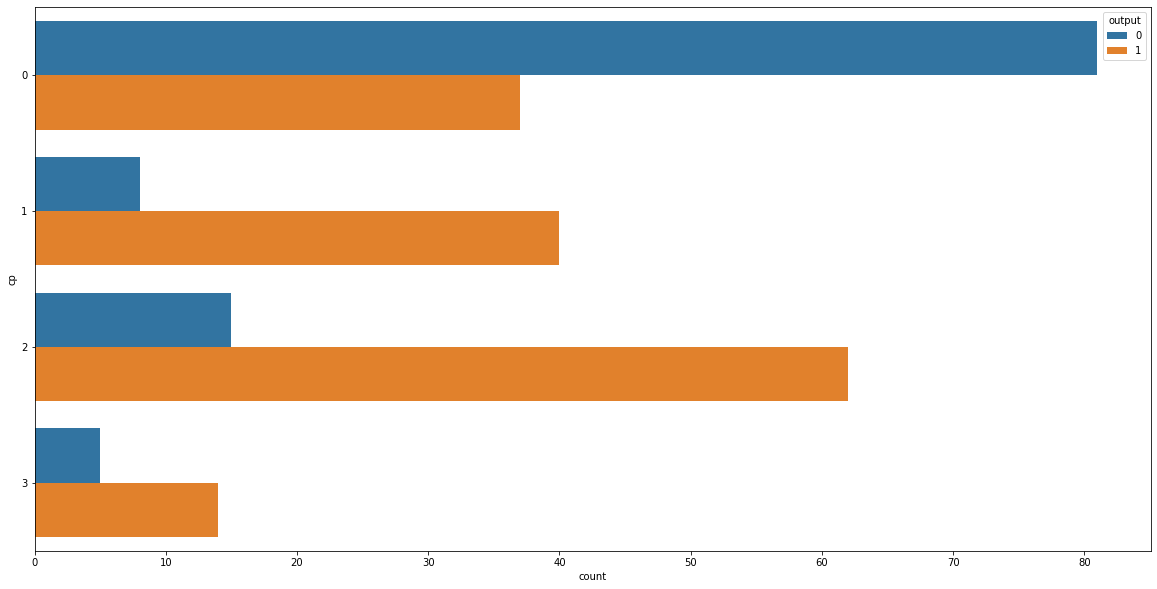

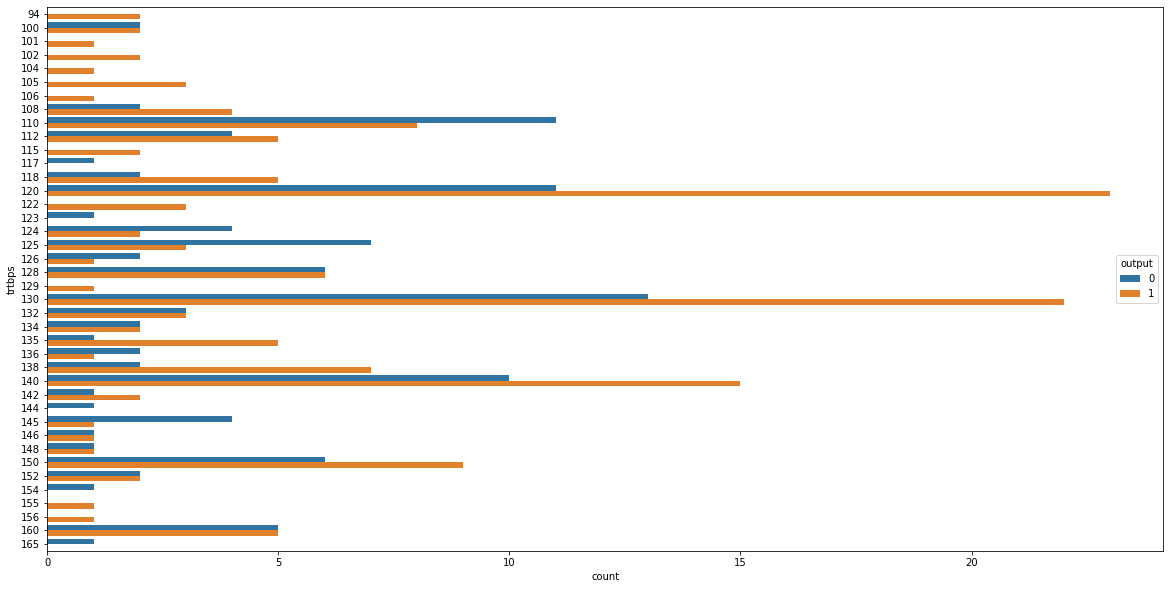

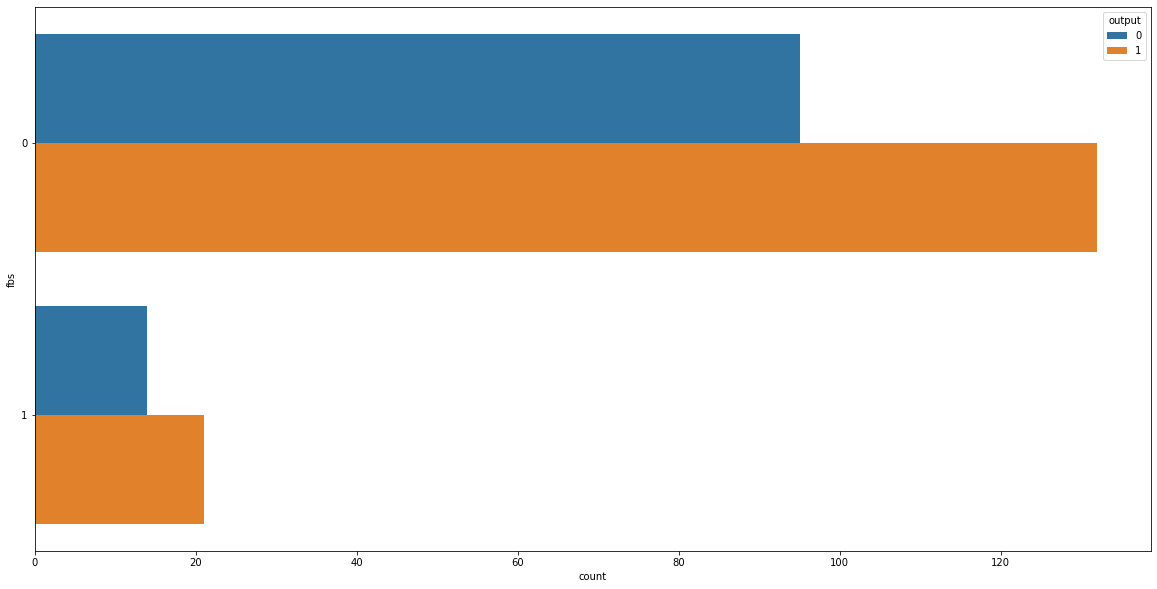

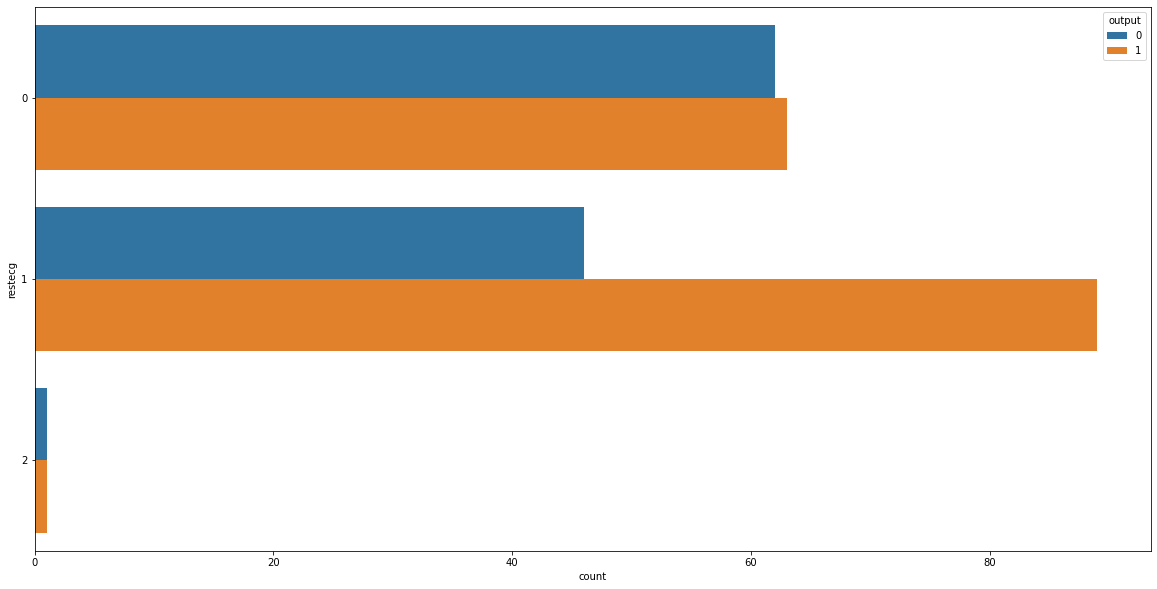

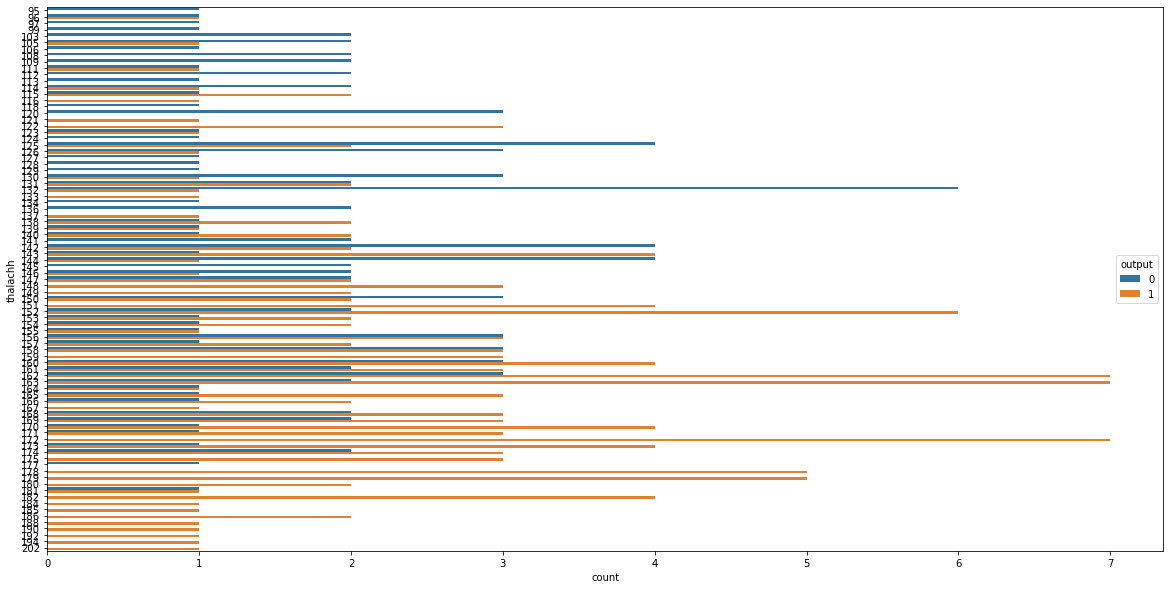

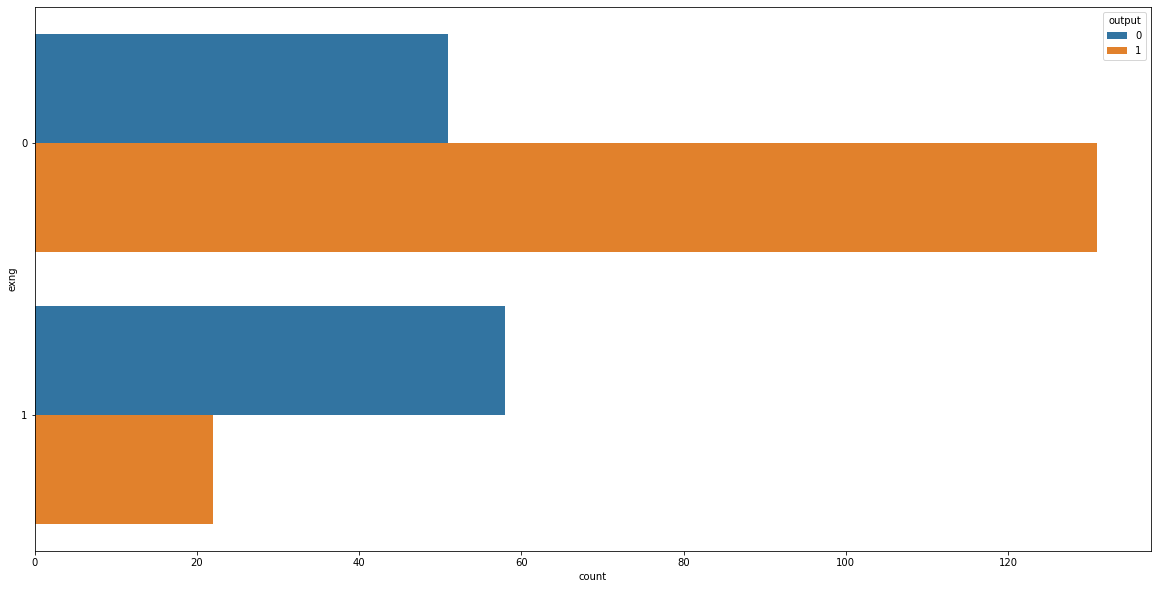

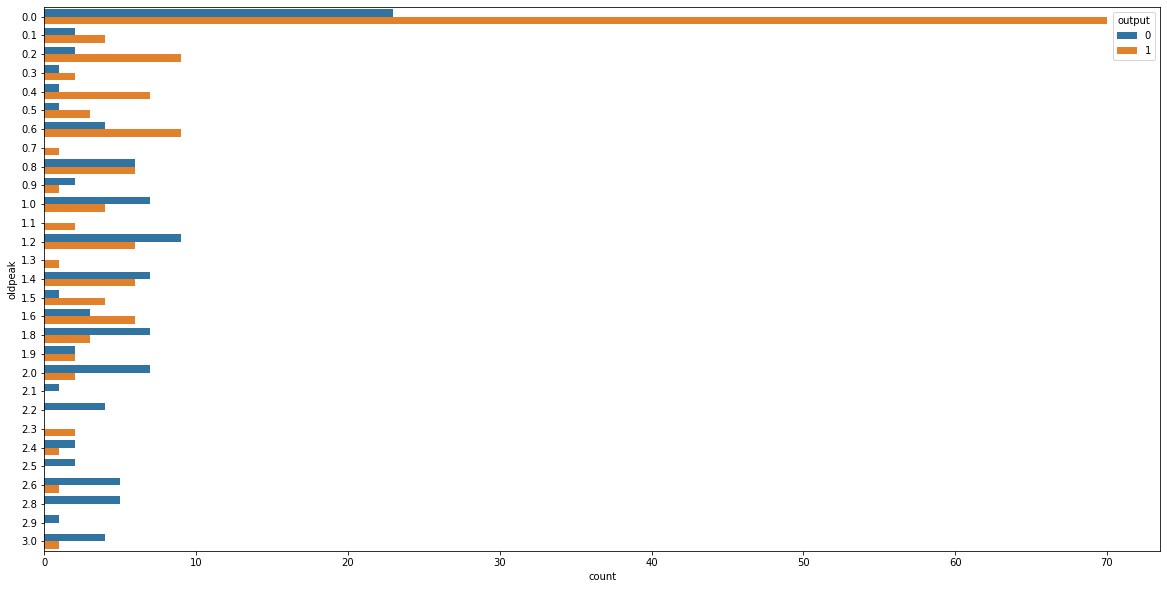

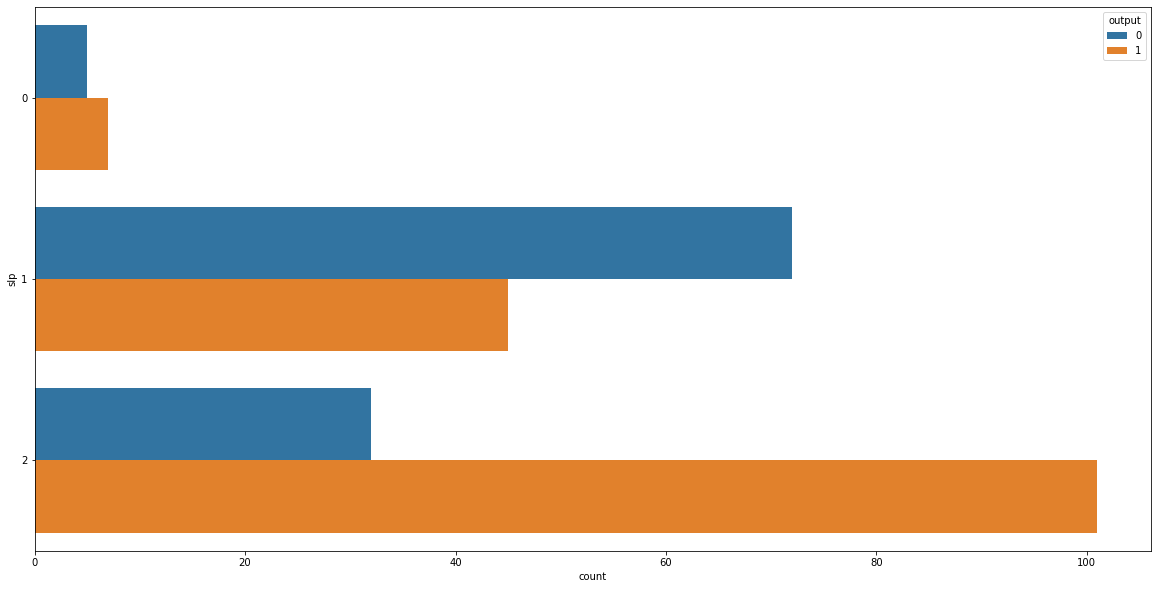

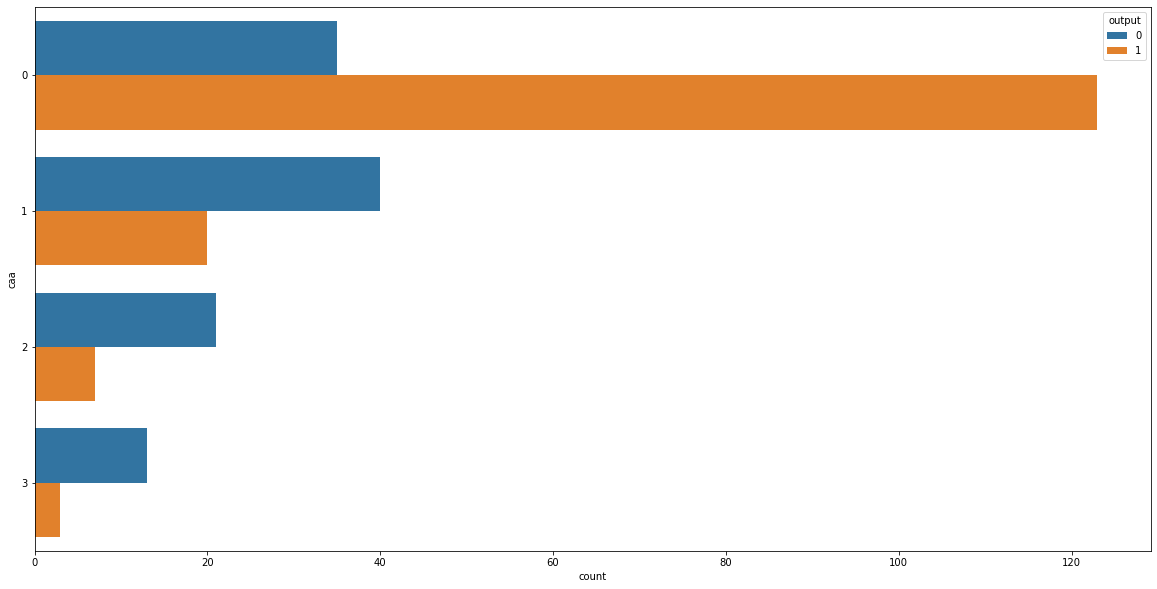

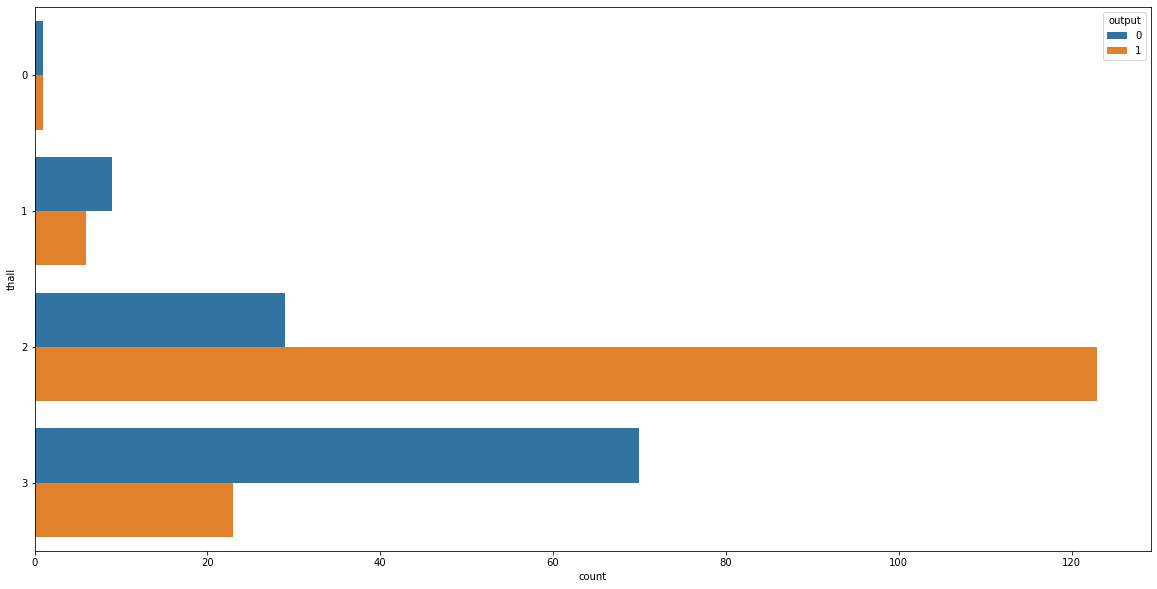

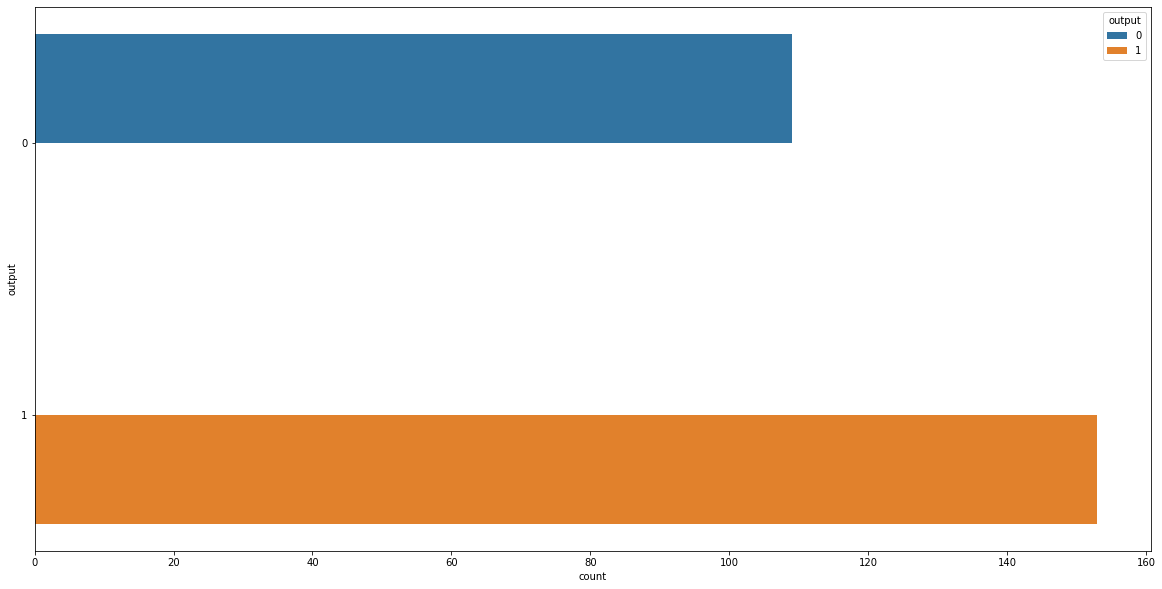

In [11]:
#Visualiza gráficos relacionando cada coluna ao output e sua contagem

for coluna in df:
    data = df[coluna]
    output = df['output']
    #Devido ao número de valores diferentes entre si, a coluna chol não deve ser verificado por esse laço
    if df[coluna].name != 'chol':
        plt.subplots(figsize = (20,10))
        sns.countplot(y=data, hue=output)
        plt.show()




Aqui pude visualizar de forma gráfica, quais são as condições em que os indivíduos se tornam mais vulneráveis.

# Visualização de distribuição dos outputs, por correlação de colunas

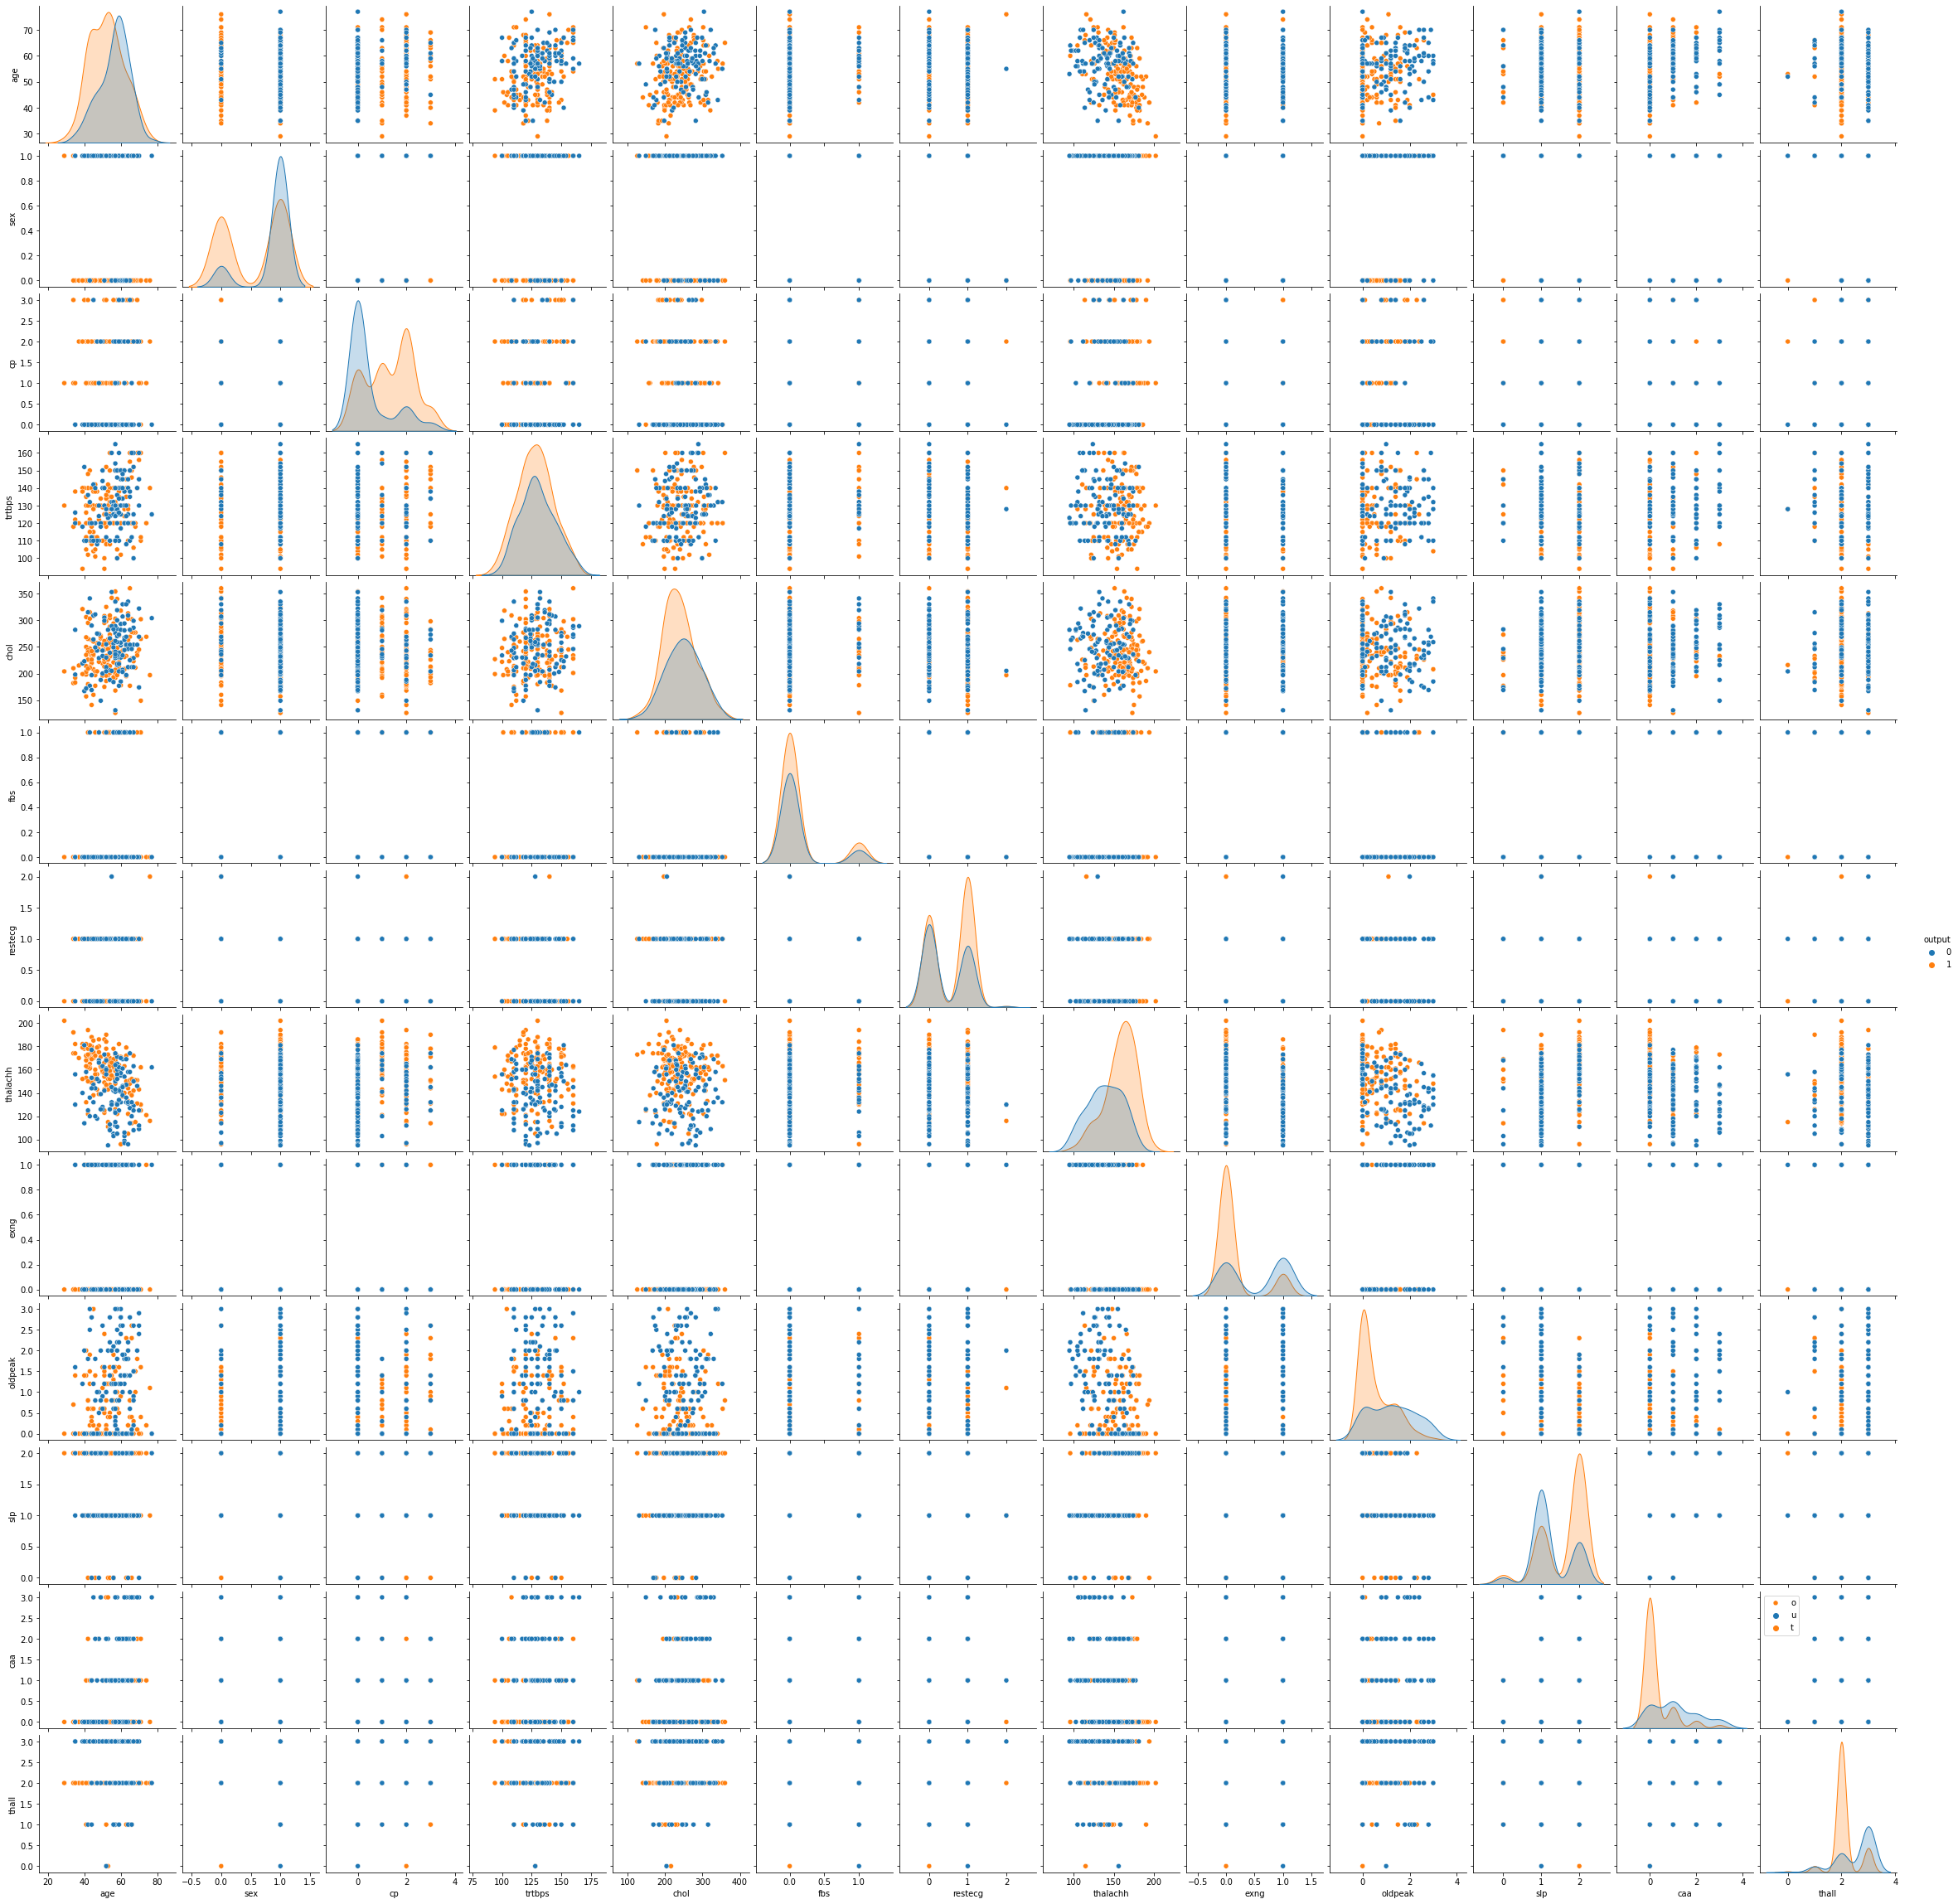

In [12]:
sns.pairplot(df, hue='output')
plt.legend('output')
plt.show()

# Visuazalição da correlação, utilizando um heatmap

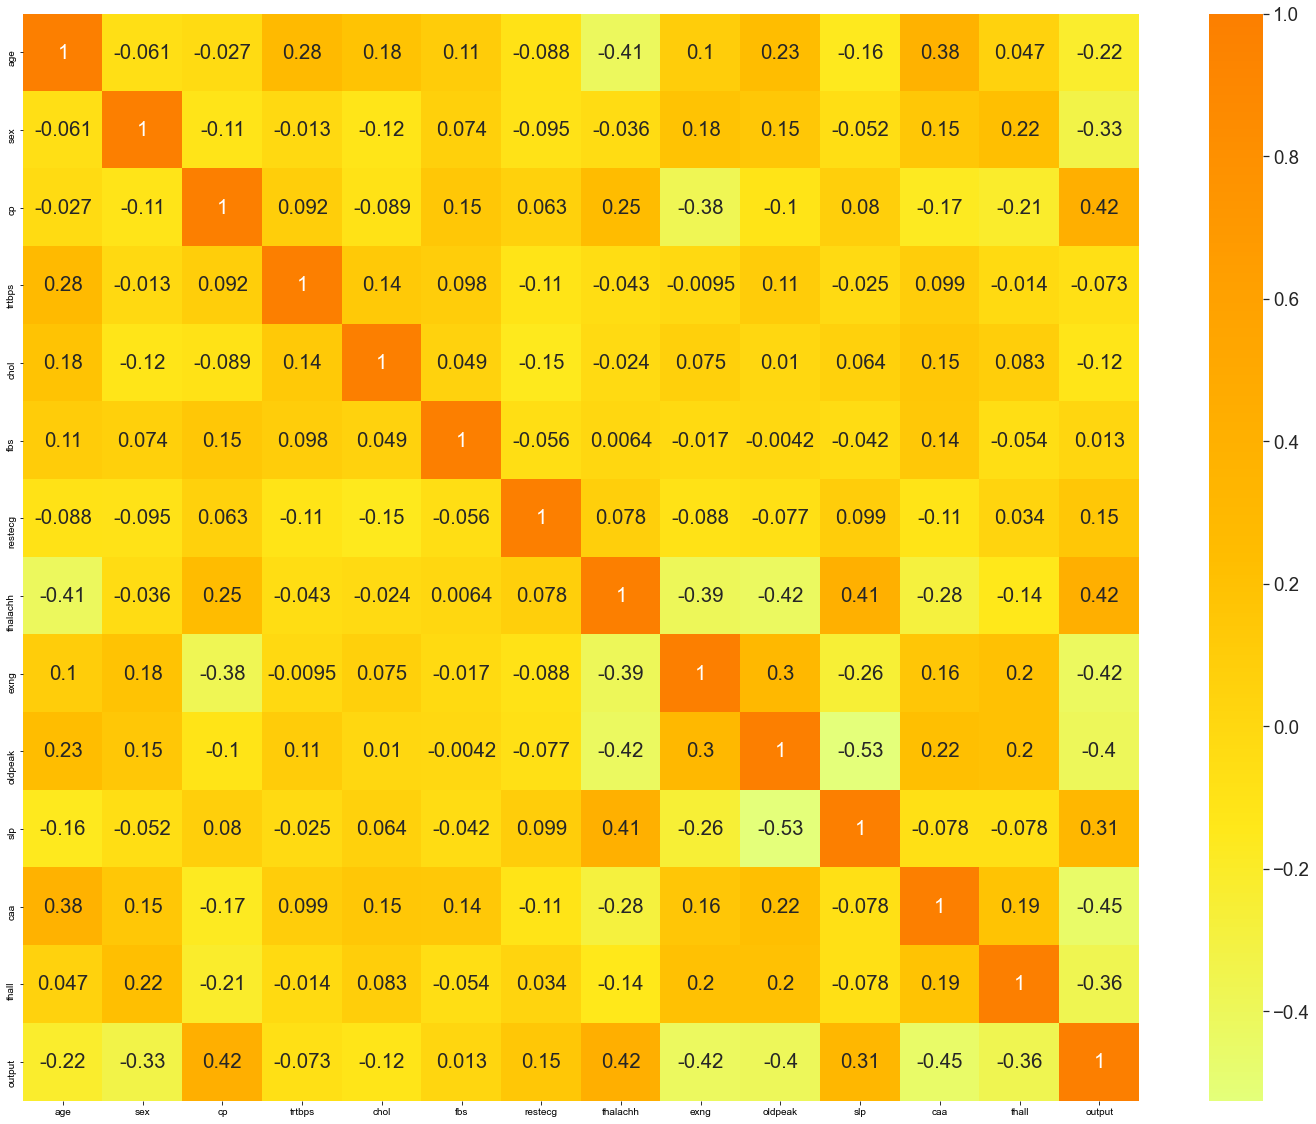

In [13]:
plt.subplots(figsize = (25,20))
sns.set(font_scale=1.7)

sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

Observando a última coluna do heatmap, correspondente a coluna 'output' da tabela de dados, podemos encontrar quais colunas são mais responsáveis pelo resultado.
As colunas são:

    - cp
    - thalach
    - slp

# Resultados obtidos

A partir do que foi analisado, as três principais variáveis são:
    
cp: Representa a dor no peito.

    - Os valores 1, 2 e 3 possuem mais vulnerabilidade de sofrer um ataque cardíaco.
    
thalach: Representa a frequência cardíaca alcançada

    - Um resultado acima de 150 possui muito mais chance de sofrer um ataque cardíaco.
    
slp: Representa a inclinação do pico no segmento ST de exercício

    - O valor 2 apresenta muito mais vulnerabilidade de sofrer um ataque cardíaco.

Os três principais valores encontrados, são referentes a condições resultantes de exames médicos e são bastante conclusivos. Porém, é importante elencar, também, características dos indivíduos que também se correlacionam bastante com o resultado e que podem ajudar na prevenção:

age: Representa a idade do indivíduo

    - O maior número de indivíduos vulneráveis, estão entre os 39 e 56 anos.

sex: Representa o sexo do indivíduo

    - Indivíduos do sexo feminino estão mais propensos a sofrer um ataque cardíaco.
    
trtbps: Representa a pressão arterial em repouso

    - Resultados acima de 112, estão mais vulneráveis a um ataque cardíaco.
    
exng: Representa se a angina foi causada por exercícios físicos

    - Resultados para 0, que representa 'Não', possuem mais propenção a sofrer um ataque cardíaco. 
    
caa: Que é referente ao número de vasos maiores:
    
    - Resultados de valor 0 possuem mais chances de sofrer um ataque cardíaco

